In [1]:
import numpy as np
import matplotlib.pyplot as plt

from framework_pkg.framework import FrameWork
from framework_pkg.survival_probablity import MSW , ULDM, SunEarthDistance, ParseDate

plt.rcParams['text.usetex']=True
plt.style.use('classic')

param = {'SinT12': 0.308, 'T13': 8.57, 'M12': 7.5e-5,
         'mdm' : 0., 'mu1': 0., 'mu2': 0., 'mu3': 0., 'alpha' : 0., 'epsx':1., 'epsy':0. }

Enu   = np.logspace(-1, np.log10(16), 300)

frame = FrameWork()

In [2]:
# ls, year, angle = SunEarthDistance(ParseDate('2020,1,1'), 365.25, 0.5)

In [3]:
#peanuts_B8 = np.loadtxt('Data/peanuts_B8.txt')
#peanuts_B8M = np.loadtxt('Data/peanuts_B8M.txt')

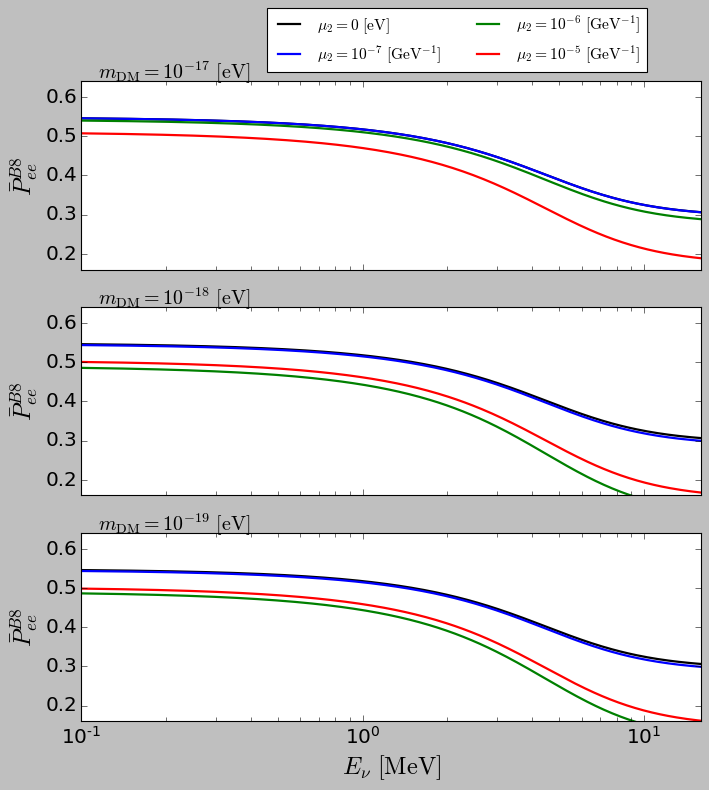

In [4]:
mu2 = [0., 1e-7, 1e-6, 1e-5]

color = ['k','b','g','r']

label = [r'$\mu_2  = 0     \ \rm [eV]$'    ,
         r'$\mu_2  = 10^{-7} \ \rm [GeV^{-1}]$',
         r'$\mu_2  = 10^{-6}  \ \rm [GeV^{-1}]$' ,
         r'$\mu_2  = 10^{-5}   \ \rm [GeV^{-1}]$'  ]

plt.rcParams.update({'font.size': 18})
fig  = plt.figure(figsize=(10,10))

fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(wspace=0.2)

ax1 = fig.add_subplot(311)
ax1.set_ylim(0.16,0.64)
ax1.set_xlim(0.1,16)
ax1.set_xscale('log')

ax1.tick_params(axis='both', which='minor', length=4)
ax1.tick_params(axis='both', which='major', length=5)

#ax1.set_xlabel(r'$E_\nu \ \rm [MeV]$',fontsize=18)
ax1.set_ylabel(r'$ \bar{P}^{B8}_{ee} $',fontsize=22)
ax1.xaxis.set_major_formatter(plt.NullFormatter())

param['mdm'] = 1e4
for i,m in enumerate(mu2):
    param['mu2'] = m
    Pee, _, ls, _ = ULDM(param, Enu)
    Pee_av = np.mean(Pee/ls**2 , axis=0)
    ax1.plot(Enu,Pee_av,color=color[i],lw=2,label=label[i])
ax1.set_title(r'$m_{\rm DM} = 10^{-17} \ \rm [eV]$',y=1.0, pad=2, x=.15, fontsize=18)    

ax2 = fig.add_subplot(312)
ax2.set_ylim(0.16,0.64)
ax2.set_xlim(0.1,16)
ax2.set_xscale('log')

ax2.tick_params(axis='both', which='minor', length=4)
ax2.tick_params(axis='both', which='major', length=5)


ax2.set_ylabel(r'$ \bar{P}^{B8}_{ee}$',fontsize=22)
ax2.xaxis.set_major_formatter(plt.NullFormatter())

param['mdm'] = 1e3
for i,m in enumerate(mu2):
    param['mu2'] = m
    Pee, _, ls, _ = ULDM(param, Enu)
    Pee_av = np.mean(Pee/ls**2 , axis=0)
    ax2.plot(Enu,Pee_av,color=color[i],lw=2,label=label[i])
ax2.set_title(r'$m_{\rm DM} = 10^{-18} \ \rm [eV]$',y=1.0, pad=2, x=.15,fontsize=18)

ax0 = fig.add_subplot(313)
ax0.set_ylim(0.16,0.64)
ax0.set_xlim(0.1,16)
ax0.set_xscale('log')

ax0.tick_params(axis='both', which='minor', length=4)
ax0.tick_params(axis='both', which='major', length=5)

ax0.set_xlabel(r'$E_\nu \ \rm [MeV]$',fontsize=22)
ax0.set_ylabel(r'$ \bar{P}^{B8}_{ee}$',fontsize=22)

param['mdm'] = 1e2
for i,m in enumerate(mu2):
    param['mu2'] = m
    Pee, _, ls, _ = ULDM(param, Enu)
    Pee_av = np.mean(Pee/ls**2 , axis=0)
    ax0.plot(Enu,Pee_av,color=color[i], lw=2,label=label[i])
ax0.set_title(r'$m_{\rm DM} = 10^{-19} \ \rm [eV]$',y=1.0, pad=2, x=.15,fontsize=18)
    
plt.legend(loc=(0.3,3.45),ncol=2,fontsize=14)

plt.savefig('Pee_Bar_alpha0epsx1epsy0.pdf',bbox_inches='tight')

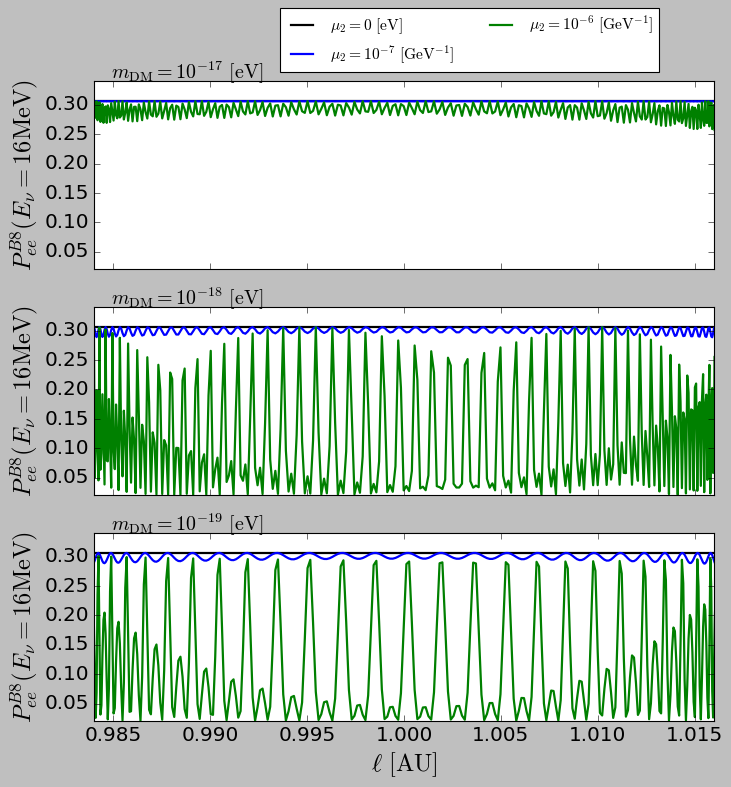

In [5]:
mu2 = [0., 1e-7, 1e-6]

color = ['k','b','g','r']

label = [r'$\mu_2  = 0     \ \rm [eV]$'    ,
         r'$\mu_2  = 10^{-7} \ \rm [GeV^{-1}]$',
         r'$\mu_2  = 10^{-6}  \ \rm [GeV^{-1}]$' ,
         r'$\mu_2  = 10^{-5}   \ \rm [GeV^{-1}]$'  ]

plt.rcParams.update({'font.size': 18})
fig  = plt.figure(figsize=(10,10))

fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(wspace=0.2)

ax1 = fig.add_subplot(311)
ax1.set_ylim(0.02,0.34)
ax1.set_xlim(0.984,1.016)

ax1.tick_params(axis='both', which='minor', length=4)
ax1.tick_params(axis='both', which='major', length=5)

ax1.set_ylabel(r'$ P^{B8}_{ee}(E_\nu = 16 \rm MeV) $',fontsize=22)
ax1.xaxis.set_major_formatter(plt.NullFormatter())

param['mdm'] = 1e4
for i,m in enumerate(mu2):
    param['mu2'] = m
    Pee, _, ls, angle = ULDM(param, Enu)
    ax1.plot(ls[:int(ls.shape[0]/2),-1], Pee[:int(ls.shape[0]/2),-1], color=color[i], lw=2, label=label[i])
ax1.set_title(r'$m_{\rm DM} = 10^{-17} \ \rm [eV]$',y=1.0, pad=2, x=.15, fontsize=18)    

ax2 = fig.add_subplot(312)
ax2.set_ylim(0.02,0.34)
ax2.set_xlim(0.984,1.016)

ax2.tick_params(axis='both', which='minor', length=4)
ax2.tick_params(axis='both', which='major', length=5)

ax2.set_ylabel(r'$ P^{B8}_{ee}(E_\nu = 16 \rm MeV)$',fontsize=22)
ax2.xaxis.set_major_formatter(plt.NullFormatter())

param['mdm'] = 1e3
for i,m in enumerate(mu2):
    param['mu2'] = m
    Pee, _, ls, angle = ULDM(param, Enu)
    ax2.plot(ls[:int(ls.shape[0]/2),-1], Pee[:int(ls.shape[0]/2),-1], color=color[i], lw=2, label=label[i])
ax2.set_title(r'$m_{\rm DM} = 10^{-18} \ \rm [eV]$',y=1.0, pad=2, x=.15,fontsize=18)

ax0 = fig.add_subplot(313)
ax0.set_ylim(0.02,0.34)
ax0.set_xlim(0.984,1.016)

ax0.tick_params(axis='both', which='minor', length=4)
ax0.tick_params(axis='both', which='major', length=5)

ax0.set_xlabel(r'$\ell \ \rm [AU]$',fontsize=22)
ax0.set_ylabel(r'$ P^{B8}_{ee}(E_\nu = 16 \rm MeV)$',fontsize=22)
ax0.get_xaxis().get_major_formatter().set_useOffset(False)

param['mdm'] = 1e2
for i,m in enumerate(mu2):
    param['mu2'] = m
    Pee, _, ls, angle = ULDM(param, Enu)
    ax0.plot(ls[:int(ls.shape[0]/2),-1], Pee[:int(ls.shape[0]/2),-1], color=color[i], lw=2, label=label[i])

ax0.set_title(r'$m_{\rm DM} = 10^{-19} \ \rm [eV]$',y=1.0, pad=2, x=.15,fontsize=18)

plt.legend(loc=(0.3,3.45),ncol=2,fontsize=14)
plt.savefig('Pee_E16_alpha0epsx1epsy0.pdf',bbox_inches='tight')

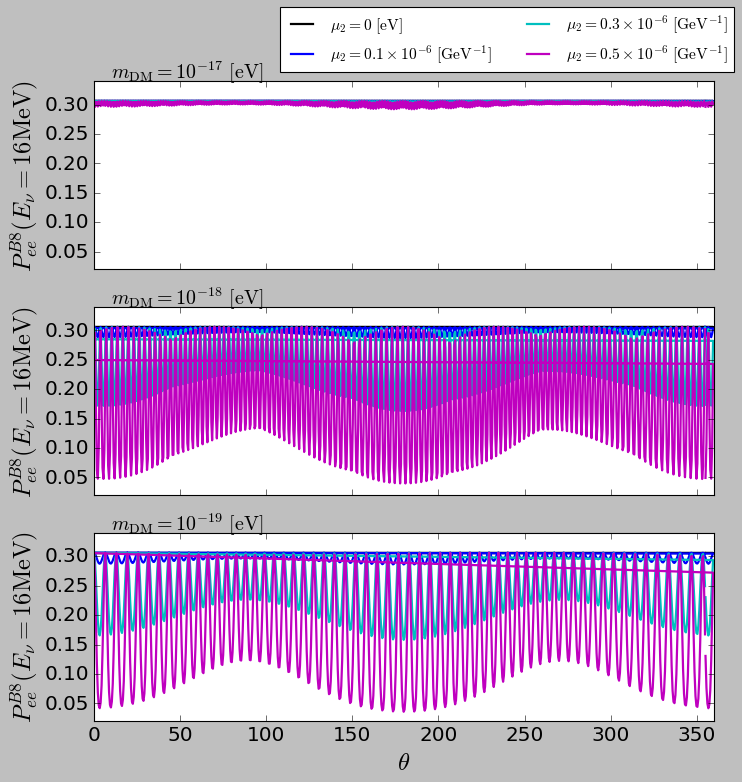

In [7]:
mu2 = [0., 0.1e-6, 0.3e-6, 0.5e-6]

color = ['k','b','c','m']

label = [r'$\mu_2  = 0     \ \rm [eV]$'    ,
         r'$\mu_2  = 0.1 \times 10^{-6} \ \rm [GeV^{-1}]$',
         r'$\mu_2  = 0.3 \times 10^{-6}  \ \rm [GeV^{-1}]$' ,
         r'$\mu_2  = 0.5 \times 10^{-6}   \ \rm [GeV^{-1}]$'  ]

plt.rcParams.update({'font.size': 18})
fig  = plt.figure(figsize=(10,10))

fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(wspace=0.2)

ax1 = fig.add_subplot(311)
ax1.set_ylim(0.02,0.34)
ax1.set_xlim(0,360)

ax1.tick_params(axis='both', which='minor', length=4)
ax1.tick_params(axis='both', which='major', length=5)

ax1.set_ylabel(r'$ P^{B8}_{ee}(E_\nu = 16 \rm MeV) $',fontsize=22)
ax1.xaxis.set_major_formatter(plt.NullFormatter())

param['mdm'] = 1e4
for i,m in enumerate(mu2):
    param['mu2'] = m
    Pee, _, ls, angle = ULDM(param, Enu)
    ax1.plot(angle, Pee[:,-1], color=color[i], lw=2, label=label[i])
ax1.set_title(r'$m_{\rm DM} = 10^{-17} \ \rm [eV]$',y=1.0, pad=2, x=.15, fontsize=18)    

ax2 = fig.add_subplot(312)
ax2.set_ylim(0.02,0.34)
ax2.set_xlim(0,360)

ax2.tick_params(axis='both', which='minor', length=4)
ax2.tick_params(axis='both', which='major', length=5)

ax2.set_ylabel(r'$ P^{B8}_{ee}(E_\nu = 16 \rm MeV)$',fontsize=22)
ax2.xaxis.set_major_formatter(plt.NullFormatter())

param['mdm'] = 1e3
for i,m in enumerate(mu2):
    param['mu2'] = m
    Pee, _, ls, angle = ULDM(param, Enu)
    ax2.plot(angle, Pee[:,-1], color=color[i], lw=2, label=label[i])
ax2.set_title(r'$m_{\rm DM} = 10^{-18} \ \rm [eV]$',y=1.0, pad=2, x=.15,fontsize=18)

ax0 = fig.add_subplot(313)
ax0.set_ylim(0.02,0.34)
ax0.set_xlim(0,360)

ax0.tick_params(axis='both', which='minor', length=4)
ax0.tick_params(axis='both', which='major', length=5)

ax0.set_xlabel(r'$\theta $',fontsize=22)
ax0.set_ylabel(r'$ P^{B8}_{ee}(E_\nu = 16 \rm MeV)$',fontsize=22)
#ax0.get_xaxis().get_major_formatter().set_useOffset(False)

param['mdm'] = 1e2
for i,m in enumerate(mu2):
    param['mu2'] = m
    Pee, _, ls, angle = ULDM(param, Enu)
    ax0.plot(angle, Pee[:,-1], color=color[i], lw=2, label=label[i])
ax0.set_title(r'$m_{\rm DM} = 10^{-19} \ \rm [eV]$',y=1.0, pad=2, x=.15,fontsize=18)

plt.legend(loc=(0.3,3.45),ncol=2,fontsize=14)
plt.savefig('Pee_E16_alpha0epsx1epsy0_angle.pdf',bbox_inches='tight')